In [24]:
from collections import Counter
import string
text = "The future of technology is both exciting and unpredictable. Advancements in artificial intelligence, machine learning, and automation are reshaping industries globally. As these technologies evolve, they will create new opportunities for innovation, while also presenting challenges in terms of ethics, privacy, and security. Researchers and developers are continuously working on pushing the boundaries of what machines can do. The potential for AI in healthcare, education, and transportation is vast, offering numerous possibilities for progress."
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on',
    'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
    'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're',
    've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn',
    'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
])
text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
words = text_clean.split()
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)
print(word_counts.most_common(10))

[('future', 1), ('technology', 1), ('exciting', 1), ('unpredictable', 1), ('advancements', 1), ('artificial', 1), ('intelligence', 1), ('machine', 1), ('learning', 1), ('automation', 1)]


In [25]:
import random
import string
text = "The future of technology is both exciting and unpredictable. Advancements in artificial intelligence, machine learning, and automation are reshaping industries globally. As these technologies evolve, they will create new opportunities for innovation, while also presenting challenges in terms of ethics, privacy, and security. Researchers and developers are continuously working on pushing the boundaries of what machines can do. The potential for AI in healthcare, education, and transportation is vast, offering numerous possibilities for progress."
text_clean = text.translate(str.maketrans('', '', string.punctuation)).lower()
tokens = text_clean.split()
bigrams = list(zip(tokens[:-1], tokens[1:]))
trigrams = list(zip(tokens[:-2], tokens[1:-1], tokens[2:]))
bigram_dict = {}
trigram_dict = {}
for w1, w2 in bigrams:
    if w1 not in bigram_dict:
        bigram_dict[w1] = [w2]
    else:
        bigram_dict[w1].append(w2)
for w1, w2, w3 in trigrams:
    if (w1, w2) not in trigram_dict:
        trigram_dict[(w1, w2)] = [w3]
    else:
        trigram_dict[(w1, w2)].append(w3)
def generate_text(start_word, num_words):
    current_word = start_word
    generated_text = [current_word]
    while len(generated_text) < num_words:
        if len(generated_text) > 1:
            last_two_words = (generated_text[-2], generated_text[-1])
            if last_two_words in trigram_dict:
                next_word = random.choice(trigram_dict[last_two_words])
            else:
                next_word = random.choice(bigram_dict.get(generated_text[-1], [""]))
        else:
            next_word = random.choice(bigram_dict.get(current_word, [""]))
        generated_text.append(next_word)
        current_word = next_word
    return ' '.join(generated_text)
generated_text = generate_text('artificial', 10)
print(generated_text)

artificial intelligence machine learning and automation are reshaping industries globally


In [26]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
text = "The quick brown fox jumps over the lazy dog. The dog was very lazy."
tokens = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'the', 'dog', 'was', 'very', 'lazy', '.']
Filtered Tokens: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'dog', 'lazy']
Stemmed Words: ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', 'dog', 'lazi']
Lemmatized Words: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', 'dog', 'lazy']


Word Frequency: Counter({'lazy': 2, 'dog': 2, 'quick': 1, 'brown': 1, 'fox': 1, 'jumps': 1})


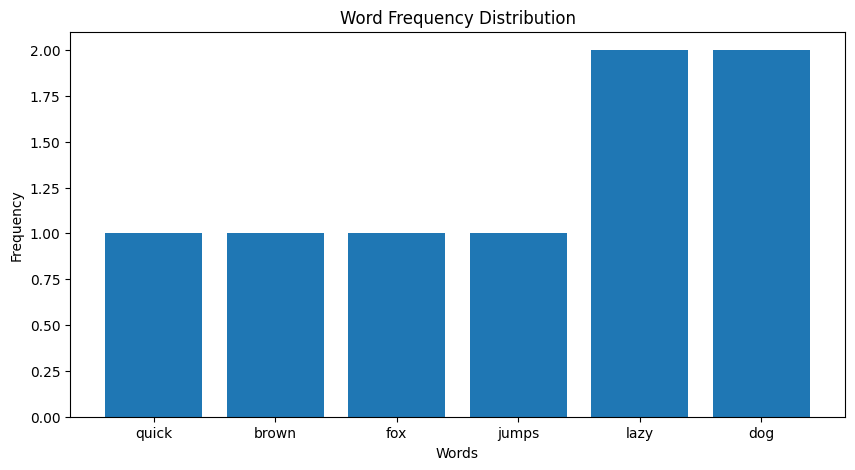

In [27]:
from collections import Counter
import matplotlib.pyplot as plt
word_freq = Counter(filtered_tokens)
print("Word Frequency:", word_freq)
plt.figure(figsize=(10, 5))
plt.bar(word_freq.keys(), word_freq.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()


In [28]:
from nltk.util import bigrams, trigrams
bigrams_list = list(bigrams(filtered_tokens))
trigrams_list = list(trigrams(filtered_tokens))
print("Bigrams:", bigrams_list)
print("Trigrams:", trigrams_list)

Bigrams: [('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'lazy'), ('lazy', 'dog'), ('dog', 'dog'), ('dog', 'lazy')]
Trigrams: [('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'lazy'), ('jumps', 'lazy', 'dog'), ('lazy', 'dog', 'dog'), ('dog', 'dog', 'lazy')]


In [29]:
import random
word_dict = {}
for word1, word2 in bigrams_list:
    if word1 in word_dict:
        word_dict[word1].append(word2)
    else:
        word_dict[word1] = [word2]
word = random.choice(list(word_dict.keys()))
generated_sentence = [word]

for _ in range(10):
    next_word = random.choice(word_dict.get(word, ["."]))
    generated_sentence.append(next_word)
    word = next_word

print("Generated Text:", " ".join(generated_sentence))

Generated Text: fox jumps lazy dog lazy dog lazy dog lazy dog lazy


In [30]:
from transformers import pipeline
generator = pipeline("text-generation", model="gpt2")
generated_text = generator("The quick brown fox", max_length=50, num_return_sequences=1)
print("GPT-2 Generated Text:", generated_text[0]['generated_text'])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT-2 Generated Text: The quick brown foxes are not the strongest in sight of the beasts of prey. Those who know how to fight are more skilled than the hunters, but can't fight against the wolves with bare arms. As they fight, that's when they learn
